# DBSCAN


Density-based spatial clustering of applications with noise (DBSCAN) is a popular data clustering algorithm based on densities, typically used in Data Mining and Machine Learning.

DBSCAN groups all data points to separate high density areas from low density areas. It also marks data points found in low density regions as atypical values (outliers). The resulting groups can have different shapes, depending on the density of the data points

## Basic Algorithmic Idea for DBSCAN

The DBSCAN algorithm captures the dense regions as groups and requires two parameters mainly:

* `Epsilon:` the max (euclidean) distance between a pair of points. Two points are considered neighbors if and only if they are separated by a distance less or equal to epsilon.
* `MinPoints:` The min amount of necessary points to form a dense grouping.

<img src='https://miro.medium.com/max/870/0*bUyZlx3rbNneiUA_'>

`MinPts = 4` means that we require at least 4 points to form a `dense grouping`. Plus, a pair of points must be separated by a distance less or equal to `Epsilon` to be considered neighbors. According to these 2 parameters, the data points are classified in 3 categories:

* `Central Point:` A point selected is a central point if it has at least a minimum number of points (MinPts) included in its epsilon distance neighborhood. In the previous figure, the red points are central points that have at least `MinPts = 4` in their neighborhood. If we have a central point, this means we are in a dense region.
* `Border Point:` A point that is inside a neighborhood of a central point but is not a central point itself (less than MinPts neighbors). In the previous figure, yellow dots are identified as border points.If we have a border point, it means that the point is close or in the limit of a dense region.
* `Noise Point:` A point that is neither a central point nor a border point. This means that these points are atypical values which are not associated to a dense group. In the previous figure the blue dot is identified as a noise point.

## DBSCAN Algorithm

1. The algorithm starts by selecting a `random point` from the dataset. It then checks if the selected point is a `central point`, taking into account the `MinPoints`and `epsilon` variables.

2. Then, it finds the `connected points` related to all the `central points`, ignoring the non central points.

3. Assign to each non central point the closest cluster, if the cluster is inside the `epsilon` distance (`border point`). Else, it's assigned as `noise`.

4. The algorithm stops when it has explored and classified all points.

<center><img src='https://miro.medium.com/max/624/0*uL1VInnayBMuZyHx'></center>

---
# Implementing DBSCAN in Python with SKLearn

In [ ]:
# Importing DBSCAN model for clustering
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=.07, random_state=0)

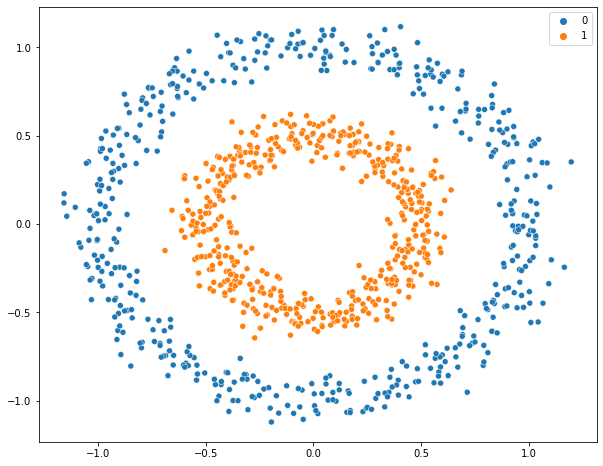

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

## Instantiating DBSCAN

* `Epsilon = 0.1`
* `MinPoints = 5`

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5)

## Training the Model

In [ ]:
model = dbscan.fit(X)

## Showing Results

In [ ]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X, labels, db, n_clusters):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(10, 8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14
        )
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6
        )
    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()
    return

In [ ]:
labels = dbscan.labels_ #Etiquetas correspondientes a los clústeres que asigna el algoritmo
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #Número de clústeres que encontró el algoritmo

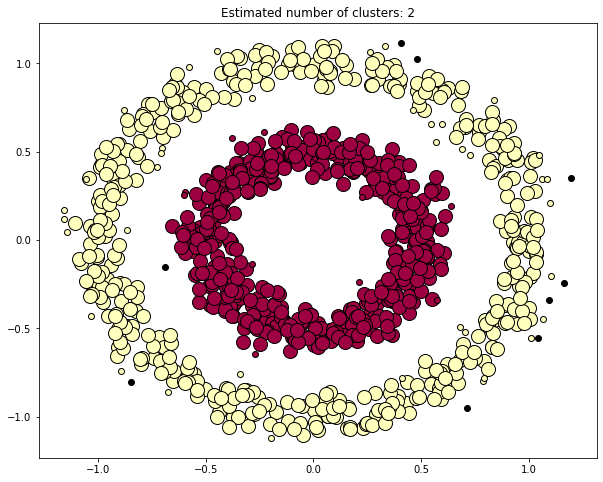

In [ ]:
plot_DBSCAN(X, labels, dbscan, n_clusters)

`Now it's your turn to fiddle with the code, checking the parameters for the function, reading the docs, changing the value of K, etc.`


---

This is a very good [video](https://www.youtube.com/watch?v=kJAqnIR0qBo) to understand the concept.